# Logistic Regression using Neural Network

In [2]:
import tensorflow as tf

In [3]:
import warnings 
warnings.filterwarnings("ignore")

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix

In [5]:
data = pd.read_csv("data.csv")
data.head()

,label,x1,x2
0,1,2.6487,4.5192
1,1,1.5438,2.4443
2,1,1.8990,4.2409
3,1,2.4711,5.8097
4,1,3.3590,6.4423


In [6]:
X_input = data[["x1","x2"]]
Y_label = data[["label"]]

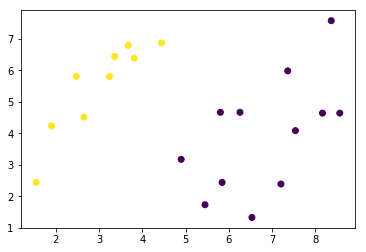

In [7]:
plt.scatter(data.x1,data.x2,c=data.label)
plt.show()

# neural network using Sigmoid function

In [8]:
# x and y should be initialized together
#defining the perceptron
x = tf.placeholder(tf.float32,[None,2]) #2 features

y = tf.placeholder(tf.float32,[None,1]) #Labels

#weights and bias
weight = tf.Variable(tf.zeros([2,1]))# 2->no. of features, 1->no. of neural

bias = tf.Variable(tf.zeros([1])) #only one bias is required

#input function
#matmul = tf.matmul(x,weight)
#I = tf.add(matmul,bias)

I = tf.add(tf.matmul(x,weight),bias)

In [9]:
#activation function
output = tf.sigmoid(I)

In [10]:
output

<tf.Tensor 'Sigmoid:0' shape=(?, 1) dtype=float32>

# Training the data

In [12]:
#define the cost/ loss function
individual_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=output)
loss = tf.reduce_mean(individual_loss)

gdo = tf.train.GradientDescentOptimizer(0.01)
train = gdo.minimize(loss)

In [13]:
#inititalize the variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [20]:
for i in range(1000):
    final_train = sess.run(train,feed_dict={x:X_input,y:Y_label})

In [21]:
sess.run(bias)

array([0.06004109], dtype=float32)

In [22]:
sess.run(weight)

array([[-0.8485078 ],
       [ 0.67765695]], dtype=float32)

# predicting the result

In [23]:
result = sess.run(output,feed_dict={x:X_input})
ypred = result.round()

In [24]:
accuracy_score(Y_label,ypred)

1.0

In [25]:
confusion_matrix(Y_label,ypred)

array([[12,  0],
       [ 0,  9]], dtype=int64)